<h3>Checkpoint Objective</h3>

In this checkpoint, we are going to work on the 'Expresso churn' dataset that was provided as part of Expresso Churn Prediction Challenge hosted by Zindi platform.

Dataset description: Expresso is an African telecommunications services company that provides telecommunication services in two African markets: Mauritania and Senegal. The data describes 2.5 million Expresso clients with more than 15 behaviour variables in order to predict the clients' churn probability.

<h3>Instructions</h3>
<ol><li>Install the necessary packages</li>
<li>Import you data and perform basic data exploration phase</li>
<ul><li>Display general information about the dataset</li>
<li>Create a pandas profiling reports to gain insights into the dataset</li>
<li>Handle Missing and corrupted values</li>
<li>Remove duplicates, if they exist</li>
<li>Handle outliers, if they exist</li>
<li>Encode categorical features</li></ul>
<li>Based on the previous data exploration train and test a machine learning classifier</li>
<li>Create a streamlit application (locally)</li>
<li>Add input fields for your features and a validation button at the end of the form</li>
<li>Import your ML model into the streamlit application and start making predictions given the provided features values</li></ol>
<h4>Note: </h4>

<ol><li>This checkpoint should be done locally, (Google colab notebooks won't work)</li>
<li>Make sure to run the app using the "streamlit run" command in your terminal.</li></ol>

# 1. Problem
<div style="position:relative">
  <div style="float:right; margin:0 0 1em 1em">
    <img src="https://zindpublic.blob.core.windows.net/public/uploads/image_attachment/image/434/969398cc-ff57-4c11-95be-7f3a47652251.png" alt="Portrait" width="100">
  </div>
  <div style="margin-top:50px">
    <p><b>Expresso</b> is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning” .</p>
      <b>Customer churn</b> is the marketing term, which is used when an existing customer stops to buying a company's products or exit to use their services. When churn occurs, the customer chooses to cut his ties with the company. That's why churn usually is a huge problem for companies's marketing team. In this case, we define a churn customer as someone who is becoming inactive and not making any transactions for <b>90 days</b>. 
    </p>
  </div>
      <p> 
          <img src="https://www.tellius.com/wp-content/uploads/2018/06/Churn.png"  > 
      </p>
    
</div>

In [7]:
# %pip install matplotlib --q
!python -m pip matplotlib

ERROR: unknown command "matplotlib"



In [44]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings
import seaborn as sns

In [45]:
data = pd.read_csv('dataset\Expresso_churn_dataset.csv')
data.head(4)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0


In [ ]:
data.shape

In [18]:
data.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [46]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [21]:
cat = df.select_dtypes(include = ['category', 'object'])
num = df.select_dtypes(include = 'number')
display(cat.head())
display(num.head())

,user_id,REGION,TENURE,MRG,TOP_PACK
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,NO,On net 200F=Unlimited _call24H
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NO,NaN
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,NO,On-net 1000F=10MilF;10d
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,NO,"Data:1000F=5GB,7d"
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,NO,Mixt 250F=Unlimited_call24H


,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1
2,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,1.0,0
3,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,11.0,0
4,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,2.0,0


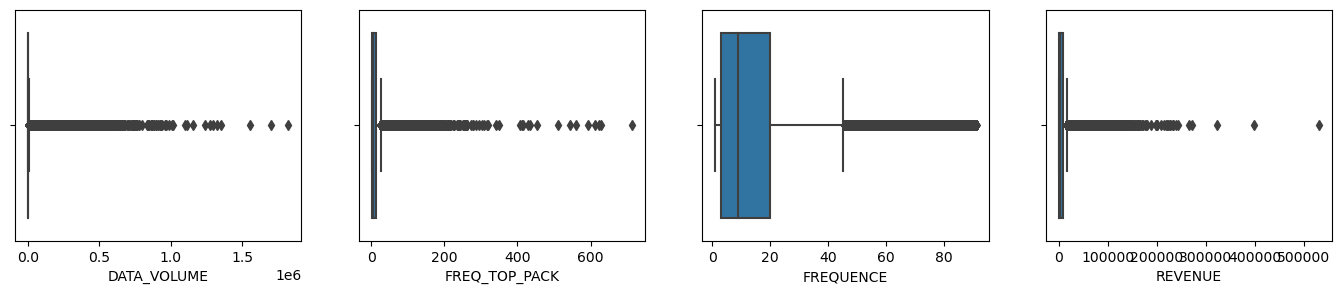

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

def OutlierChecker(dataframe, a, b, c, d):
    plt.figure(figsize=(17, 3))

    plt.subplot(1, 4, 1)
    sns.boxplot(x=dataframe[a])

    plt.subplot(1, 4, 2)
    sns.boxplot(x=dataframe[b])

    plt.subplot(1, 4, 3)
    sns.boxplot(x=dataframe[c])

    plt.subplot(1, 4, 4)
    sns.boxplot(x=dataframe[d])
    plt.show()  
    # To display the plots

OutlierChecker(df,'DATA_VOLUME', 'FREQ_TOP_PACK' , 'FREQUENCE', 'REVENUE')


In [48]:
def outlierRemoval(dataframe):
    for i in dataframe.columns:
      if i in dataframe.select_dtypes(include = 'number').columns:
          Q1 = dataframe[i].describe()[4]  # Index 3 for Q1 (25th percentile)
          Q3 = dataframe[i].describe()[6]  # Index 7 for Q3 (75th percentile)
          IQR = Q3 - Q1
          lowerIQR = Q1 - 1.5 * IQR
          upperIQR = Q3 + 1.5 * IQR
          dataframe = dataframe.loc[(dataframe[i] >= lowerIQR) & (dataframe[i] <= upperIQR)]
    return dataframe

outlierRemoval(df)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
170,0004f3a6671684d984c83c2cfa30647665dd430b,DAKAR,K > 24 month,3000.0,6.0,2999.0,1000.0,7.0,515.0,15.0,0.0,0.0,0.0,0.0,NO,58,"Data:490F=1GB,7d",5.0,0
561,001191f7d3aec518be9fcd550015fb45826c3ed2,THIES,K > 24 month,2750.0,6.0,2748.0,916.0,6.0,0.0,33.0,1.0,22.0,0.0,8.0,NO,39,Mixt 250F=Unlimited_call24H,1.0,0
2026,003d653c4f398826e80d4c00934e8b494c35d0fb,KAOLACK,K > 24 month,2900.0,13.0,3562.0,1187.0,20.0,0.0,269.0,59.0,25.0,1.0,0.0,NO,52,On net 200F=Unlimited _call24H,14.0,0
2855,0056e51ceff137babb199c0aa3667afa57dbb62c,DAKAR,K > 24 month,500.0,1.0,510.0,170.0,3.0,1790.0,8.0,39.0,3.0,1.0,0.0,NO,13,All-net 500F=2000F;5d,1.0,0
3084,005cb74811a137dca94f6ae643eb66c59e2c9808,NaN,K > 24 month,6000.0,11.0,7000.0,2333.0,16.0,34.0,233.0,12.0,8.0,1.0,1.0,NO,49,"On-net 500=4000,10d",8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150444,ff909e5e3342b7a834c4bd79cbcd668517f946bc,DAKAR,K > 24 month,9350.0,11.0,10190.0,3397.0,18.0,5295.0,63.0,37.0,2.0,2.0,4.0,NO,37,Twter_U2opia_Daily,3.0,0
2151201,ffa95fe39c8d39e420d5a48e2fceb635b28bca86,DAKAR,K > 24 month,1600.0,8.0,1405.0,468.0,9.0,1.0,1.0,10.0,5.0,3.0,1.0,NO,42,Twter_U2opia_Daily,4.0,0
2151382,ffaeeb93a3c6df0caba752952c1b234192b30bf1,NaN,K > 24 month,5700.0,14.0,4648.0,1549.0,16.0,2624.0,5.0,10.0,1.0,6.0,1.0,NO,54,"Data:490F=1GB,7d",5.0,0
2151856,ffbcf73d7758bf43363ea951d988f40ff8978a1c,NaN,K > 24 month,4100.0,11.0,4089.0,1363.0,12.0,3599.0,225.0,67.0,9.0,0.0,0.0,NO,56,Mixt 250F=Unlimited_call24H,4.0,0


In [63]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

def transformer(dataframe):
    lb = LabelEncoder()
    scaler = StandardScaler()

    dep = dataframe.drop('CHURN', axis=1)

    for i in dep.columns:
        if i in dataframe.select_dtypes(include='number').columns:
            # Scale only numerical columns
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]])
        elif i in dataframe.select_dtypes(include=['object', 'category']).columns:
            # Label encode categorical columns
            dataframe[i] = lb.fit_transform(dataframe[i])

    return dataframe


transformer(df)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,-1.732050,-1.068951,0.211319,-0.180292,0.261478,-0.175287,-0.175290,0.205652,-0.252731,0.126403,-0.241082,-0.347750,-0.174162,-0.165834,0.0,1.164700,0.304622,-0.103617,0
1,-1.732048,0.967882,-2.783691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.078775,0.959779,NaN,1
2,-1.732047,0.967882,0.211319,-0.271695,-0.717875,-0.624842,-0.624846,-0.815171,NaN,-0.215070,-0.241082,-0.253378,NaN,NaN,0.0,-0.495472,0.324475,-0.673629,0
3,-1.732045,-1.408423,0.211319,1.120448,0.261478,1.111878,1.112017,0.273707,3.039399,-0.271218,0.032106,-0.332021,NaN,NaN,0.0,1.523656,-1.124810,0.140674,0
4,-1.732044,-1.408423,0.211319,-0.637309,-0.793210,-0.629712,-0.629855,-0.883225,NaN,-0.273510,-0.348406,NaN,NaN,NaN,0.0,-0.764689,0.165650,-0.592199,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,1.732044,0.967882,0.211319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.989036,0.959779,NaN,0
2154044,1.732045,0.628410,0.211319,0.079856,0.261478,0.040237,0.040096,0.069542,-0.206356,-0.288407,-0.270352,0.265669,NaN,NaN,0.0,1.209569,-1.204223,-0.022187,0
2154045,1.732047,0.967882,0.211319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.213384,0.959779,NaN,1
2154046,1.732048,0.628410,0.211319,0.628276,-0.039861,0.223899,0.223758,-0.066567,NaN,-0.318200,0.217483,-0.159005,NaN,NaN,0.0,-0.001907,-1.462315,0.222104,0


In [ ]:
import xgboost as xgb

X = df.drop('CHURN', axis=1)
Y = df.CHURN

# Create and train an XGBoost model
model = xgb.XGBClassifier()
model.fit(X, Y)

# # Now, you can access the booster from the trained model and plot feature importance
# booster = model.get_booster()
# xgb.plot_importance(booster)
# plt.rcParams['figure.figsize'] = (5, 13)
# # Print feature importance scores
# xgb.plot_importance(model, importance_type= 'weight')
# plt.show()

# Print feature importance scores
xgb.plot_importance(model)

In [ ]:
# ANOVA F-value between label/feature

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(X,Y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(X.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(10, 'F_classif_score')
k1.reset_index(drop = True, inplace = True)

k1.sort_values(by = 'F_classif_score', ascending = False)

In [64]:
train_set = pd.concat([xtrain, ytrain], axis = 1)
test_set = pd.concat([xtest, ytest], axis = 1)

print('Train Set')
display(train_set.head())
print(f"\t\t{train_set.shape}\n\n")

print('Test Set')
display(test_set.head())
print(f"\t\t{test_set.shape}\n\n")

Train Set


,REGULARITY,DATA_VOLUME,FREQUENCE_RECH,REGION,MONTANT,CHURN
1152748,-1.168514,NaN,NaN,14,NaN,0
458629,1.523656,NaN,0.261478,3,0.347035,0
2122726,0.760874,0.224252,-0.642540,14,-0.356068,0
811600,-1.168514,NaN,-0.793210,9,-0.742774,0
230194,-1.168514,NaN,NaN,14,NaN,1


		(1723238, 6)


Test Set


,REGULARITY,DATA_VOLUME,FREQUENCE_RECH,REGION,MONTANT,CHURN
2116680,-1.213384,NaN,NaN,14,NaN,1
667545,-0.046777,NaN,-0.793210,14,-0.749805,0
2119568,-0.046777,-0.22928,0.336813,14,-0.201385,0
75541,-0.809558,NaN,NaN,12,NaN,0
376390,1.030091,NaN,-0.115196,12,-0.074827,0


		(430810, 6)




In [65]:
x = df[['REGULARITY', 'TENURE', 'MRG', 'REGION', 'TOP_PACK']]
y = df.CHURN

In [66]:
#split into train and test
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify = y)

display(xtrain.shape)
display(xtest.shape)
display(ytrain.shape)
display(ytest.shape)

(1723238, 5)

(430810, 5)

(1723238,)

(430810,)

In [67]:
train_set = pd.concat([xtrain, ytrain], axis = 1)
test_set = pd.concat([xtest, ytest], axis = 1)

print('Train Set')
display(train_set.head())
print(f"\t\t{train_set.shape}\n\n")

print('Test Set')
display(test_set.head())
print(f"\t\t{test_set.shape}\n\n")

Train Set


,REGULARITY,TENURE,MRG,REGION,TOP_PACK,CHURN
1152748,-1.168514,0.211319,0.0,0.967882,0.959779,0
458629,1.523656,0.211319,0.0,-0.899215,-1.502021,0
2122726,0.760874,0.211319,0.0,0.967882,-1.144663,0
811600,-1.168514,0.211319,0.0,0.119202,0.165650,0
230194,-1.168514,0.211319,0.0,0.967882,0.959779,1


		(1723238, 6)


Test Set


,REGULARITY,TENURE,MRG,REGION,TOP_PACK,CHURN
2116680,-1.213384,0.211319,0.0,0.967882,0.959779,1
667545,-0.046777,0.211319,0.0,0.967882,0.304622,0
2119568,-0.046777,0.211319,0.0,0.967882,0.165650,0
75541,-0.809558,0.211319,0.0,0.628410,0.959779,0
376390,1.030091,-1.286186,0.0,0.628410,0.403888,0


		(430810, 6)




In [68]:
x.isnull().sum()

REGULARITY    0
TENURE        0
MRG           0
REGION        0
TOP_PACK      0
dtype: int64

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

 #create a RandomForestClassifirer instance
Expresso_Model = RandomForestClassifier(criterion = "gini", max_depth=8, min_samples_split= 10, random_state= 42)

# #  fit the model to the training data
Expresso_Model.fit(xtrain, ytrain)

# make predictions on the training data
train_pred = Expresso_Model.predict(xtrain)

# Calculate accuracy
accuracy = accuracy_score(ytrain, train_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [70]:
# print classification report
print(classification_report(ytrain, train_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93   1400049
           1       0.69      0.64      0.66    323189

    accuracy                           0.88   1723238
   macro avg       0.80      0.79      0.79   1723238
weighted avg       0.87      0.88      0.88   1723238



In [71]:
# #  fit the model to the test data
Expresso_Model.fit(xtest, ytest)

# make predictions on the test data
test_pred = Expresso_Model.predict(xtest)

# print classification report
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93    350013
           1       0.69      0.63      0.66     80797

    accuracy                           0.88    430810
   macro avg       0.80      0.78      0.79    430810
weighted avg       0.87      0.88      0.88    430810



In [79]:
import joblib
import pickle
joblib.dump(Expresso_Model, 'ExpressoChurn_Model.pkl')

['ExpressoChurn_Model.pkl']